In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
data = pd.read_csv('data/IOTNET24_IDS.csv').drop('Unnamed: 0', axis=1)

data['duration'] = data['duration'] / 60

data.head()

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,192.168.1.195,41040,185.244.25.235,80,tcp,NaN,0.052320,0.0,0.0,S0,0,S,3,180,0,0,Benign
1,192.168.1.195,41040,185.244.25.235,80,tcp,NaN,NaN,NaN,NaN,S0,0,S,1,60,0,0,Benign
2,192.168.1.195,41040,185.244.25.235,80,tcp,NaN,NaN,NaN,NaN,S0,0,S,1,60,0,0,Benign
3,192.168.1.195,41040,185.244.25.235,80,tcp,http,0.024628,149.0,128252.0,SF,2896,ShADadttcfF,94,5525,96,139044,Benign
4,192.168.1.195,41042,185.244.25.235,80,tcp,NaN,0.052452,0.0,0.0,S0,0,S,3,180,0,0,Benign


In [69]:
malicious_data = data[data['label'] != 'Benign'].copy()

malicious_data['duration'] = malicious_data['duration'].astype(float)

malicious_data['event_index'] = malicious_data.index

malicious_data.head()

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,event_index
25,192.168.1.195,48986,185.244.25.235,6667,tcp,NaN,0.051796,0.0,0.0,S0,0,S,3,180,0,0,Malicious,25
48,192.168.1.195,48998,185.244.25.235,6667,tcp,NaN,0.051625,0.0,0.0,S0,0,S,3,180,0,0,Malicious,48
50,192.168.1.195,48998,185.244.25.235,6667,tcp,NaN,NaN,NaN,NaN,S0,0,S,1,60,0,0,Malicious,50
52,192.168.1.195,49004,185.244.25.235,6667,tcp,NaN,0.052075,0.0,0.0,S0,0,S,3,180,0,0,Malicious,52
54,192.168.1.195,49004,185.244.25.235,6667,tcp,NaN,NaN,NaN,NaN,S0,0,S,1,60,0,0,Malicious,54


In [70]:
benign_data = data[data['label'] == 'Benign'].copy()

benign_data.head()

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,192.168.1.195,41040,185.244.25.235,80,tcp,NaN,0.052320,0.0,0.0,S0,0,S,3,180,0,0,Benign
1,192.168.1.195,41040,185.244.25.235,80,tcp,NaN,NaN,NaN,NaN,S0,0,S,1,60,0,0,Benign
2,192.168.1.195,41040,185.244.25.235,80,tcp,NaN,NaN,NaN,NaN,S0,0,S,1,60,0,0,Benign
3,192.168.1.195,41040,185.244.25.235,80,tcp,http,0.024628,149.0,128252.0,SF,2896,ShADadttcfF,94,5525,96,139044,Benign
4,192.168.1.195,41042,185.244.25.235,80,tcp,NaN,0.052452,0.0,0.0,S0,0,S,3,180,0,0,Benign


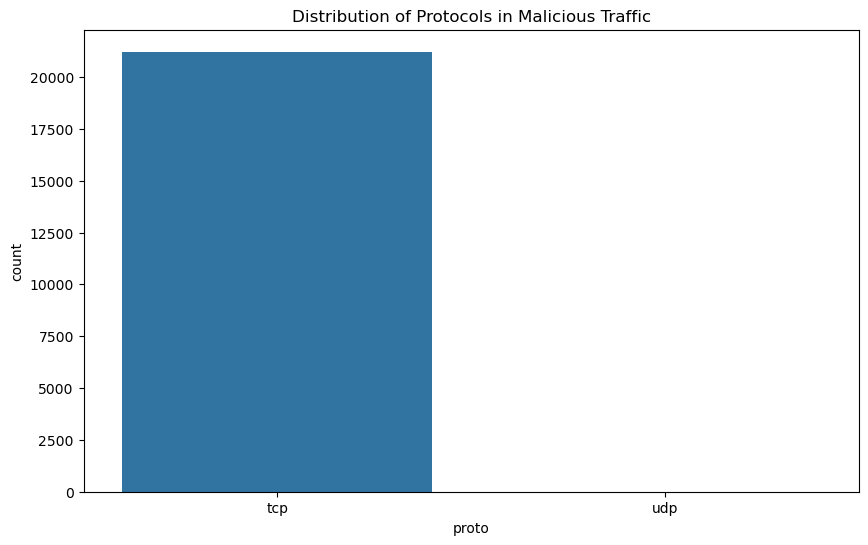

In [71]:
plt.figure(figsize=(10, 6))
sns.countplot(data=malicious_data, x='proto')
plt.title('Distribution of Protocols in Malicious Traffic')
plt.show()


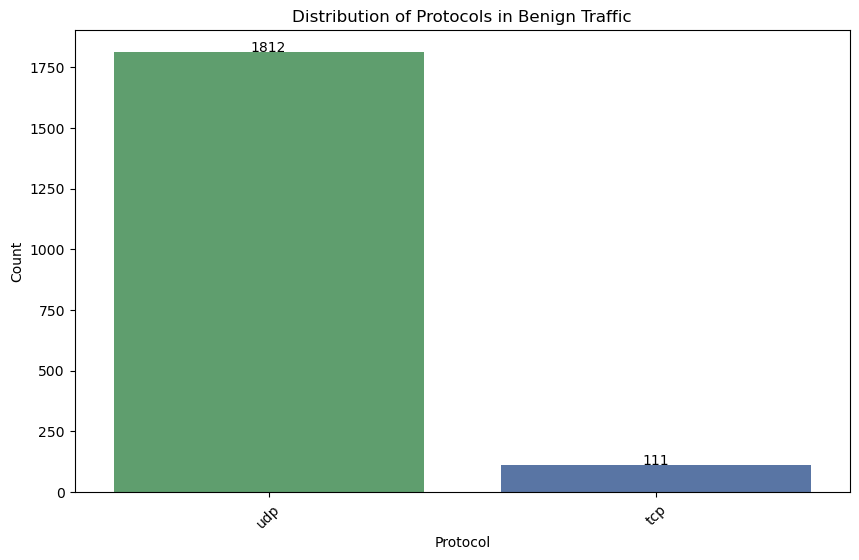

In [72]:
benign_proto_counts = benign_data['proto'].value_counts().reset_index()
benign_proto_counts.columns = ['proto', 'count_benign']

custom_colors = ['#55a868', '#4c72b0']

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=benign_proto_counts, x='proto', y='count_benign', palette=custom_colors)
plt.title('Distribution of Protocols in Benign Traffic')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.xticks(rotation=45)

for index, row in benign_proto_counts.iterrows():
    ax.text(row.name, row['count_benign'], round(row['count_benign'], 2), color='black', ha="center")

plt.show()

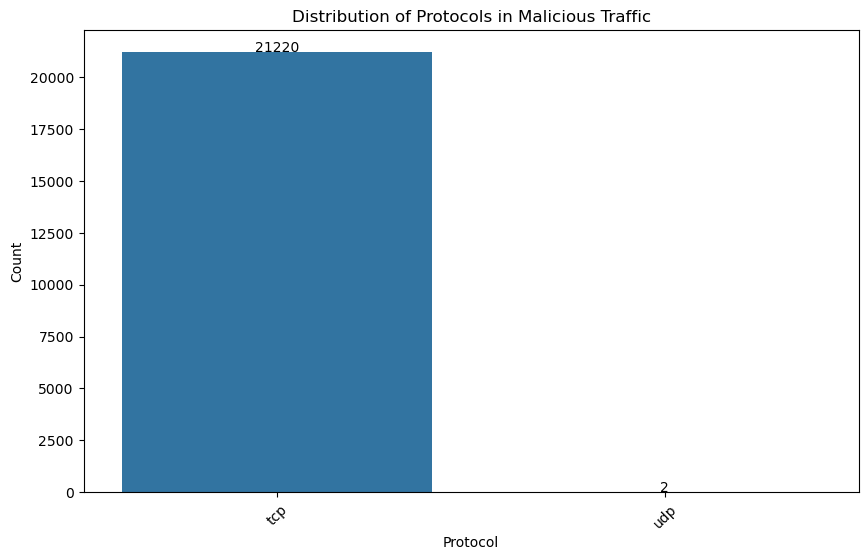

In [73]:
malicious_proto_counts = malicious_data['proto'].value_counts().reset_index()
malicious_proto_counts.columns = ['proto', 'count_malicious']

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=malicious_proto_counts, x='proto', y='count_malicious')
plt.title('Distribution of Protocols in Malicious Traffic')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.xticks(rotation=45)

for index, row in malicious_proto_counts.iterrows():
    ax.text(row.name, row['count_malicious'], round(row['count_malicious'], 2), color='black', ha="center")

plt.show()

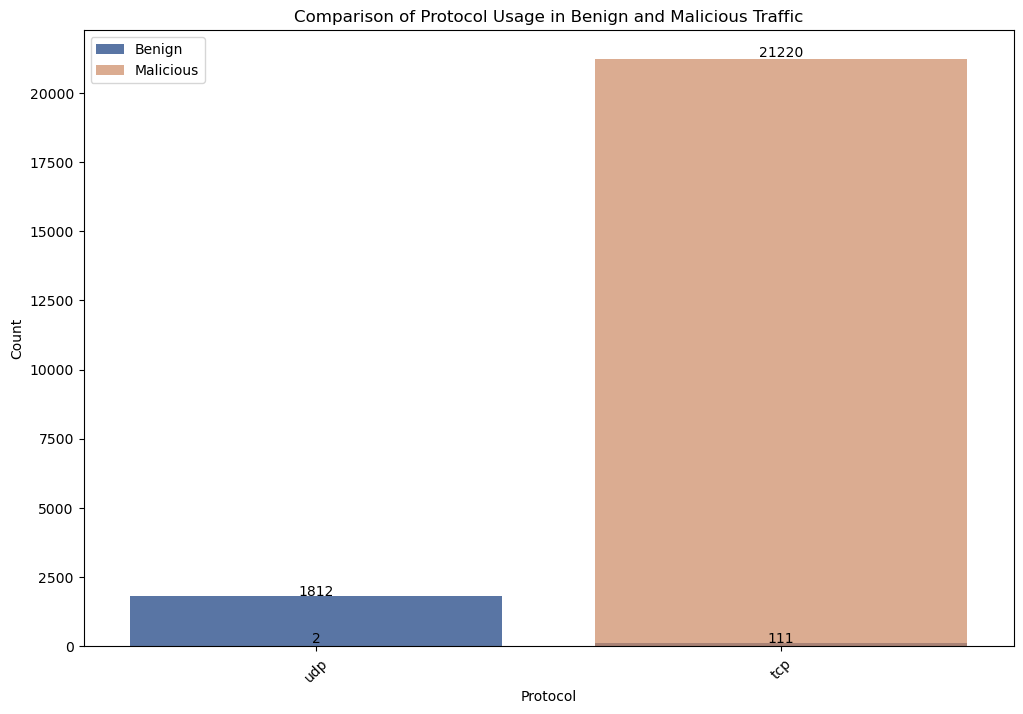

In [74]:
proto_counts = pd.merge(benign_proto_counts, malicious_proto_counts, on='proto', how='outer').fillna(0)

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=proto_counts, x='proto', y='count_benign', color='#4c72b0', label='Benign')
ax = sns.barplot(data=proto_counts, x='proto', y='count_malicious', color='#dd8452', label='Malicious', alpha=0.7)

plt.title('Comparison of Protocol Usage in Benign and Malicious Traffic')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.legend()

plt.xticks(rotation=45)

for index, row in proto_counts.iterrows():
    ax.text(row.name, row['count_benign'], int(row['count_benign']), color='black', ha="center")
    ax.text(row.name, row['count_malicious'], int(row['count_malicious']), color='black', ha="center", va='bottom')

plt.show()

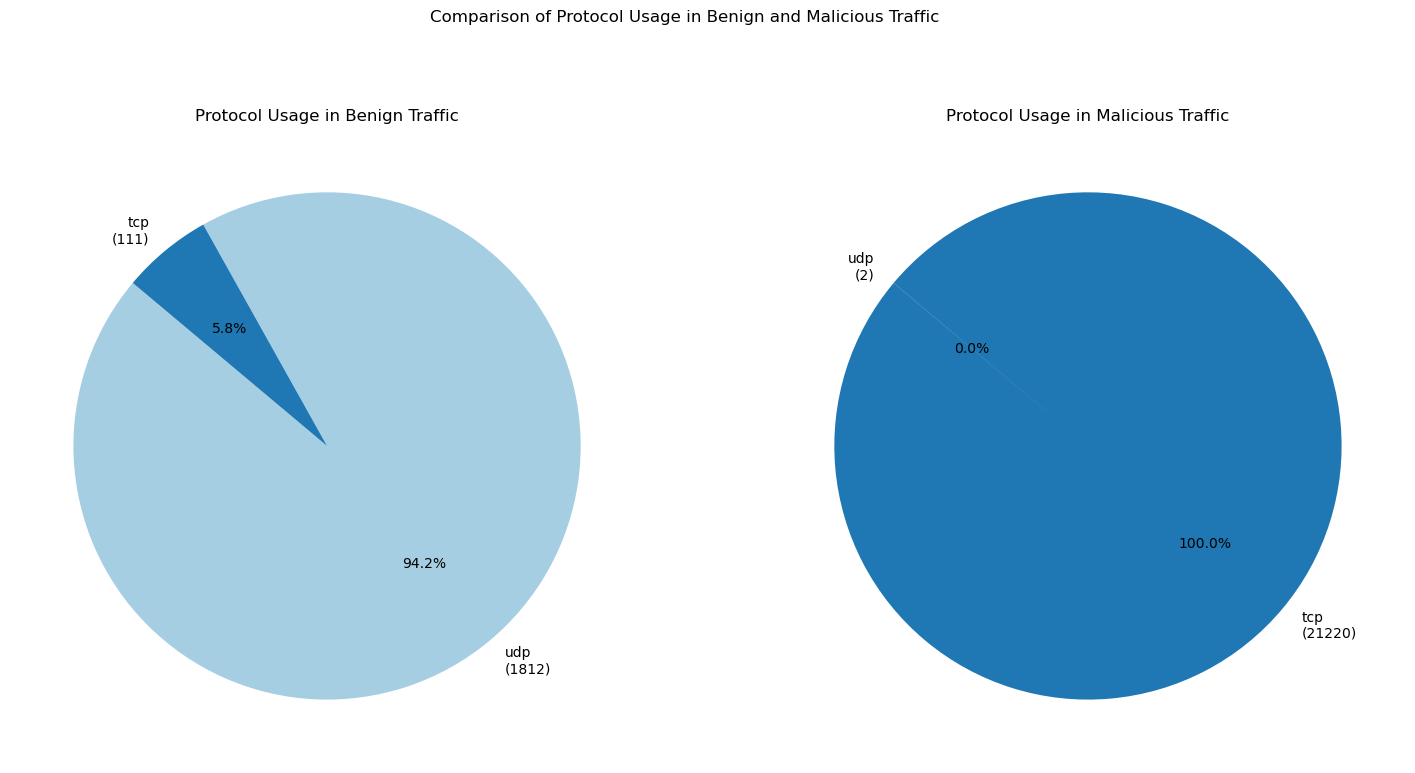

In [75]:
proto_counts = pd.merge(benign_proto_counts, malicious_proto_counts, on='proto', how='outer').fillna(0)
proto_counts.columns = ['proto', 'count_benign', 'count_malicious']

# Prepare data for pie charts
benign_data2 = proto_counts.set_index('proto')['count_benign']
malicious_data2 = proto_counts.set_index('proto')['count_malicious']

# Function to format labels with counts
def format_labels(values):
    total = sum(values)
    return [f'{label}\n({int(value)})' for label, value in zip(values.index, values)]

# Plot the pie charts
fig, axes = plt.subplots(1, 2, figsize=(18, 9))

# Pie chart for Benign Traffic
axes[0].pie(benign_data2, labels=format_labels(benign_data2), autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axes[0].set_title('Protocol Usage in Benign Traffic')

# Pie chart for Malicious Traffic
axes[1].pie(malicious_data2, labels=format_labels(malicious_data2), autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axes[1].set_title('Protocol Usage in Malicious Traffic')

plt.suptitle('Comparison of Protocol Usage in Benign and Malicious Traffic')
plt.show()

In [76]:
malicious_data.head()

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,event_index
25,192.168.1.195,48986,185.244.25.235,6667,tcp,NaN,0.051796,0.0,0.0,S0,0,S,3,180,0,0,Malicious,25
48,192.168.1.195,48998,185.244.25.235,6667,tcp,NaN,0.051625,0.0,0.0,S0,0,S,3,180,0,0,Malicious,48
50,192.168.1.195,48998,185.244.25.235,6667,tcp,NaN,NaN,NaN,NaN,S0,0,S,1,60,0,0,Malicious,50
52,192.168.1.195,49004,185.244.25.235,6667,tcp,NaN,0.052075,0.0,0.0,S0,0,S,3,180,0,0,Malicious,52
54,192.168.1.195,49004,185.244.25.235,6667,tcp,NaN,NaN,NaN,NaN,S0,0,S,1,60,0,0,Malicious,54


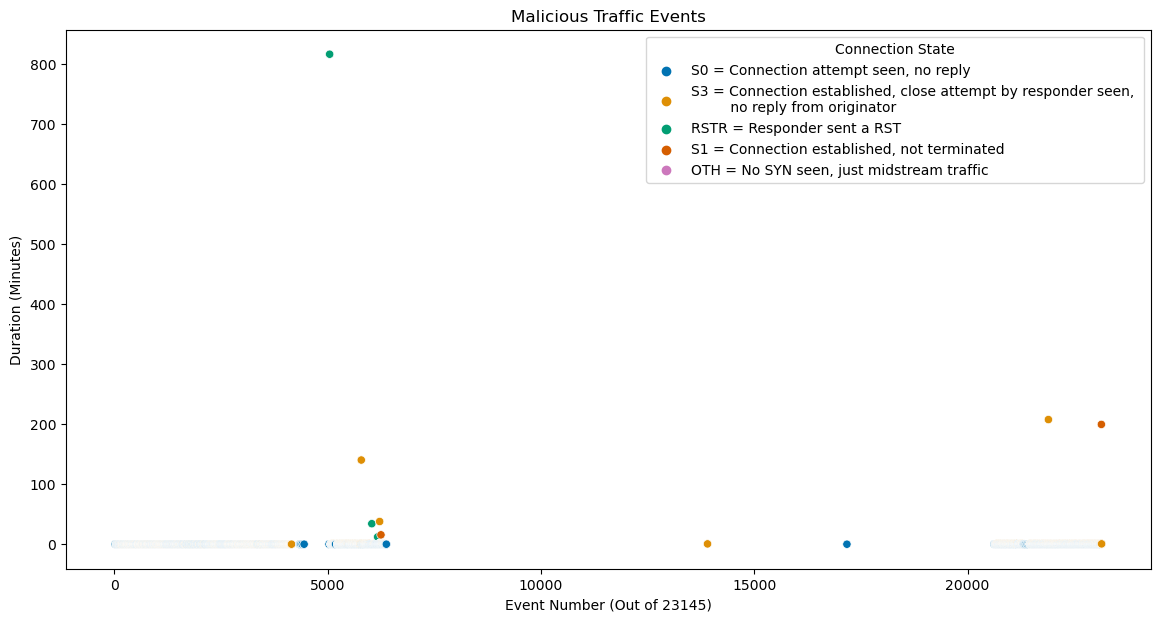

In [113]:
plt.figure(figsize=(14, 7))
scatter_plot = sns.scatterplot(data=malicious_data, x='event_index', y='duration', palette='colorblind', hue='conn_state', legend='full')
plt.title('Malicious Traffic Events')
plt.xlabel('Event Number (Out of 23145)')
plt.ylabel('Duration (Minutes)')

legend_labels = {
    'S0': 'S0 = Connection attempt seen, no reply',
    'S3': 'S3 = Connection established, close attempt by responder seen, \n         no reply from originator',
    'RSTR': 'RSTR = Responder sent a RST',
    'S1': 'S1 = Connection established, not terminated',
    'OTH': 'OTH = No SYN seen, just midstream traffic'
}

# Get the current handles and labels
handles, labels = scatter_plot.get_legend_handles_labels()

# Replace the labels with the custom labels
new_labels = [legend_labels.get(label, label) for label in labels]

# Create the custom legend
scatter_plot.legend(handles, new_labels, title='Connection State', loc='upper right')

plt.show()

In [78]:
max_duration_row = malicious_data.loc[malicious_data['duration'].idxmax()]

# Display the row
max_duration_row

id.orig_h         192.168.1.195
id.orig_p                 48986
id.resp_h        185.244.25.235
id.resp_p                  6667
proto                       tcp
service                     irc
duration             816.280318
orig_bytes              13115.0
resp_bytes              18031.0
conn_state                 RSTR
missed_bytes                  0
history               ShAdDatfr
orig_pkts                   606
orig_ip_bytes             45630
resp_pkts                  1070
resp_ip_bytes             74159
label                 Malicious
event_index                5050
Name: 5050, dtype: object

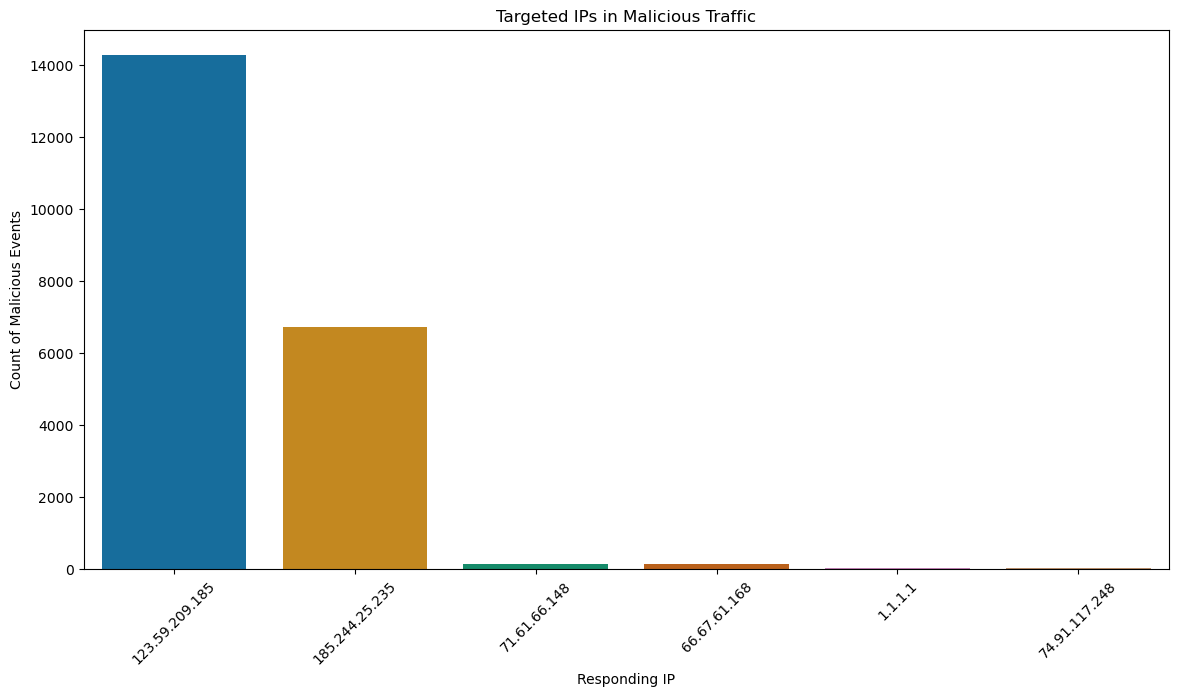

In [79]:
malicious_resp_ip_counts = malicious_data['id.resp_h'].value_counts().reset_index()
malicious_resp_ip_counts.columns = ['id.resp_h', 'count']

plt.figure(figsize=(14, 7))
sns.barplot(data=malicious_resp_ip_counts.head(20), x='id.resp_h', y='count', palette='colorblind')
plt.title('Targeted IPs in Malicious Traffic')
plt.xlabel('Responding IP')
plt.ylabel('Count of Malicious Events')
plt.xticks(rotation=45)
plt.show()

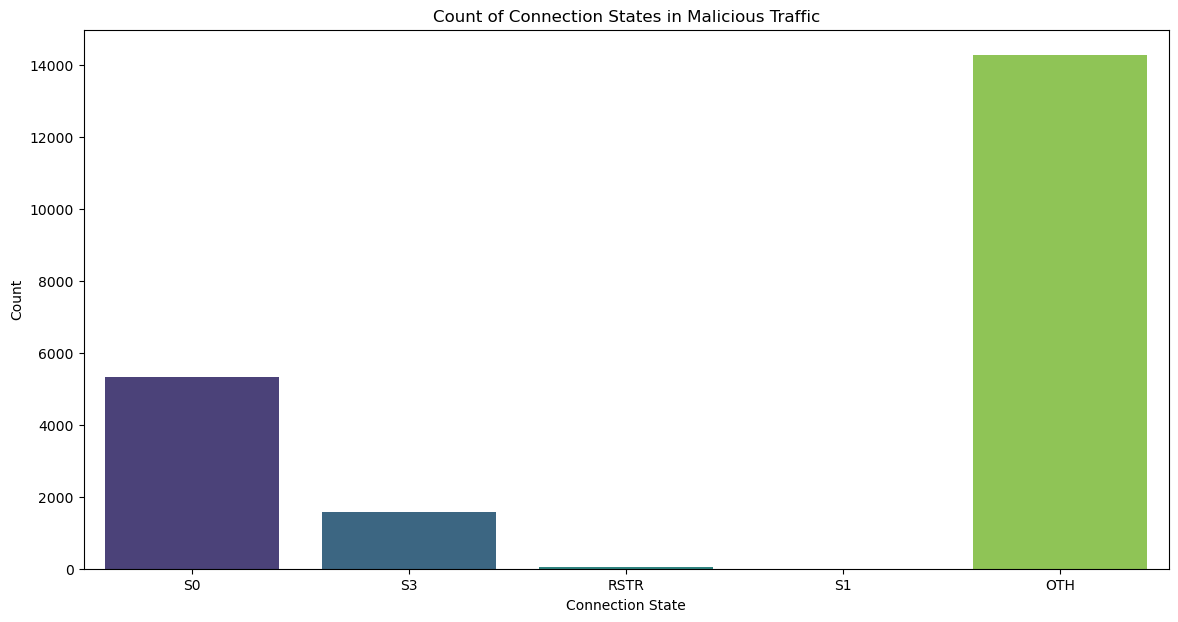

In [80]:
plt.figure(figsize=(14, 7))
sns.countplot(data=malicious_data, x='conn_state', palette='viridis')
plt.title('Count of Connection States in Malicious Traffic')
plt.xlabel('Connection State')
plt.ylabel('Count')
plt.show()

In [104]:
malicious_data['orig_bytes'].max()

75546624.0

c:\Users\dave9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dave9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


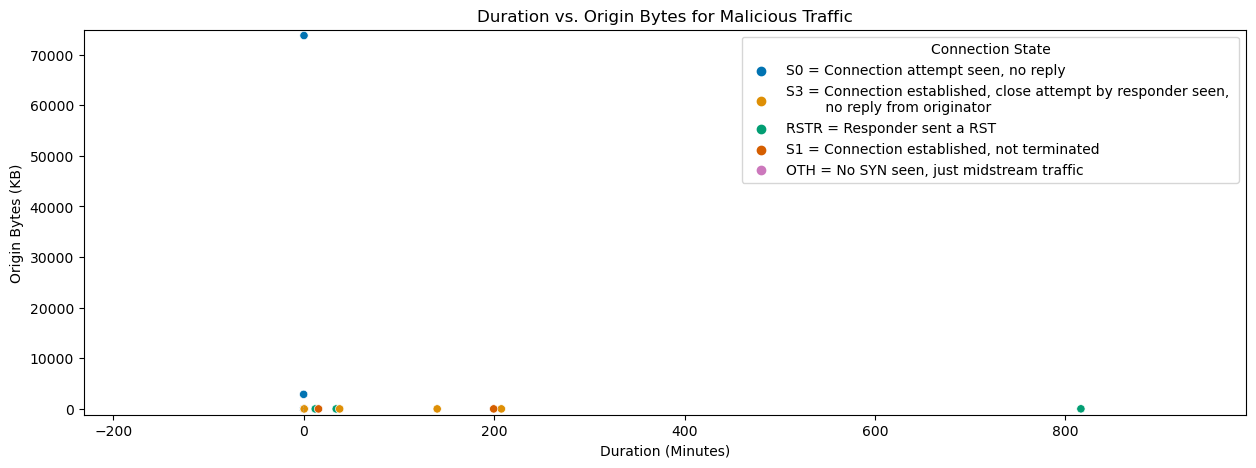

In [116]:
malicious_data['orig_bytes_kb'] = malicious_data['orig_bytes'] / 1024

plt.figure(figsize=(15, 5))
sns.scatterplot(data=malicious_data, x='duration', y='orig_bytes_kb', palette='colorblind', hue='conn_state', legend='full')
sns.kdeplot(data=malicious_data, x='duration', y='orig_bytes_kb', hue='conn_state', levels=5, fill=True, alpha=0.3)
plt.title('Duration vs. Origin Bytes for Malicious Traffic')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Origin Bytes (KB)')

legend_labels = {
    'S0': 'S0 = Connection attempt seen, no reply',
    'S3': 'S3 = Connection established, close attempt by responder seen, \n         no reply from originator',
    'RSTR': 'RSTR = Responder sent a RST',
    'S1': 'S1 = Connection established, not terminated',
    'OTH': 'OTH = No SYN seen, just midstream traffic'
}

# Get the current handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Replace the labels with the custom labels
new_labels = [legend_labels.get(label, label) for label in labels]

# Create the custom legend
plt.legend(handles, new_labels, title='Connection State', loc='upper right')

plt.show()





c:\Users\dave9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dave9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dave9\AppData\Local\Temp\ipykernel_7764\1847024768.py:5: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=malicious_data, x='duration', y='resp_bytes_kb', hue='conn_state', levels=5, fill=True, alpha=0.3)


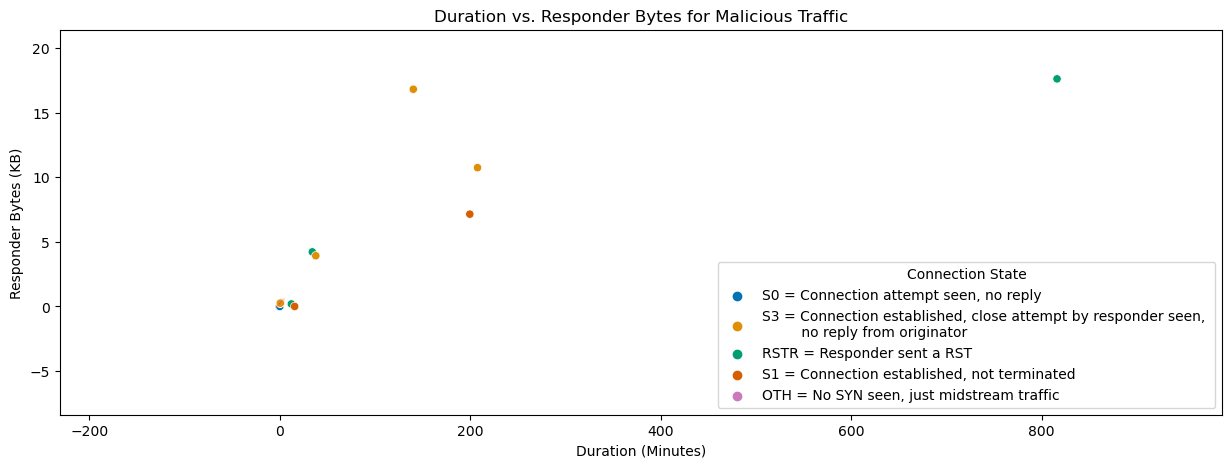

In [112]:
malicious_data['resp_bytes_kb'] = malicious_data['resp_bytes'] / 1024

plt.figure(figsize=(15, 5))
sns.scatterplot(data=malicious_data, x='duration', y='resp_bytes_kb', palette='colorblind', hue='conn_state', legend='full')
sns.kdeplot(data=malicious_data, x='duration', y='resp_bytes_kb', hue='conn_state', levels=5, fill=True, alpha=0.3)
plt.title('Duration vs. Responder Bytes for Malicious Traffic')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Responder Bytes (KB)')

legend_labels = {
    'S0': 'S0 = Connection attempt seen, no reply',
    'S3': 'S3 = Connection established, close attempt by responder seen, \n         no reply from originator',
    'RSTR': 'RSTR = Responder sent a RST',
    'S1': 'S1 = Connection established, not terminated',
    'OTH': 'OTH = No SYN seen, just midstream traffic'
}

# Get the current handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

# Replace the labels with the custom labels
new_labels = [legend_labels.get(label, label) for label in labels]

# Create the custom legend
plt.legend(handles, new_labels, title='Connection State', loc='lower right')

plt.show()


c:\Users\dave9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dave9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dave9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dave9\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=vector, 

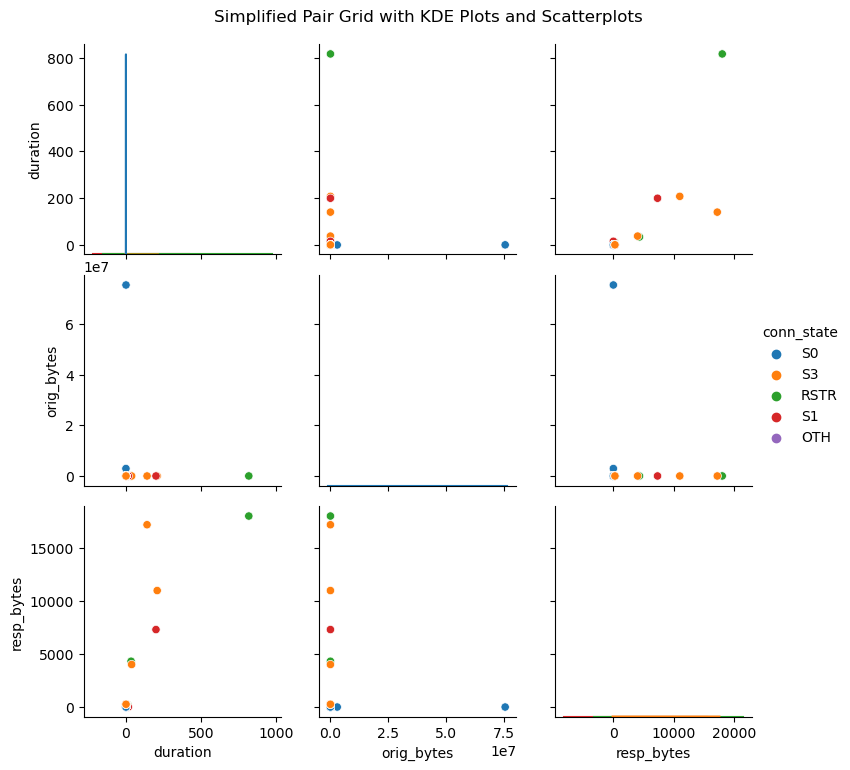

In [84]:
g = sns.PairGrid(malicious_data, vars=['duration', 'orig_bytes', 'resp_bytes'], hue='conn_state')
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.suptitle('Simplified Pair Grid with KDE Plots and Scatterplots', y=1.02)
plt.show()

In [85]:
label = {'Malicious': 1,'Benign': 0}
data.label = [label[item] for item in data.label]

In [86]:
protocol = {'tcp': 1,'udp': 0}
data.proto = [protocol[item] for item in data.proto]

In [87]:
data.head()

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,192.168.1.195,41040,185.244.25.235,80,1,NaN,0.052320,0.0,0.0,S0,0,S,3,180,0,0,0
1,192.168.1.195,41040,185.244.25.235,80,1,NaN,NaN,NaN,NaN,S0,0,S,1,60,0,0,0
2,192.168.1.195,41040,185.244.25.235,80,1,NaN,NaN,NaN,NaN,S0,0,S,1,60,0,0,0
3,192.168.1.195,41040,185.244.25.235,80,1,http,0.024628,149.0,128252.0,SF,2896,ShADadttcfF,94,5525,96,139044,0
4,192.168.1.195,41042,185.244.25.235,80,1,NaN,0.052452,0.0,0.0,S0,0,S,3,180,0,0,0


In [88]:
cleaned = data.drop(['id.orig_h', 'id.resp_h', 'service', 'conn_state', 'history'], axis=1)
cleaned.head()


,id.orig_p,id.resp_p,proto,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,41040,80,1,0.052320,0.0,0.0,0,3,180,0,0,0
1,41040,80,1,NaN,NaN,NaN,0,1,60,0,0,0
2,41040,80,1,NaN,NaN,NaN,0,1,60,0,0,0
3,41040,80,1,0.024628,149.0,128252.0,2896,94,5525,96,139044,0
4,41042,80,1,0.052452,0.0,0.0,0,3,180,0,0,0


c:\Users\dave9\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 0, 'id.orig_p'),
  Text(1.5, 0, 'id.resp_p'),
  Text(2.5, 0, 'proto'),
  Text(3.5, 0, 'duration'),
  Text(4.5, 0, 'orig_bytes'),
  Text(5.5, 0, 'resp_bytes'),
  Text(6.5, 0, 'missed_bytes'),
  Text(7.5, 0, 'orig_pkts'),
  Text(8.5, 0, 'orig_ip_bytes'),
  Text(9.5, 0, 'resp_pkts'),
  Text(10.5, 0, 'resp_ip_bytes'),
  Text(11.5, 0, 'label')])

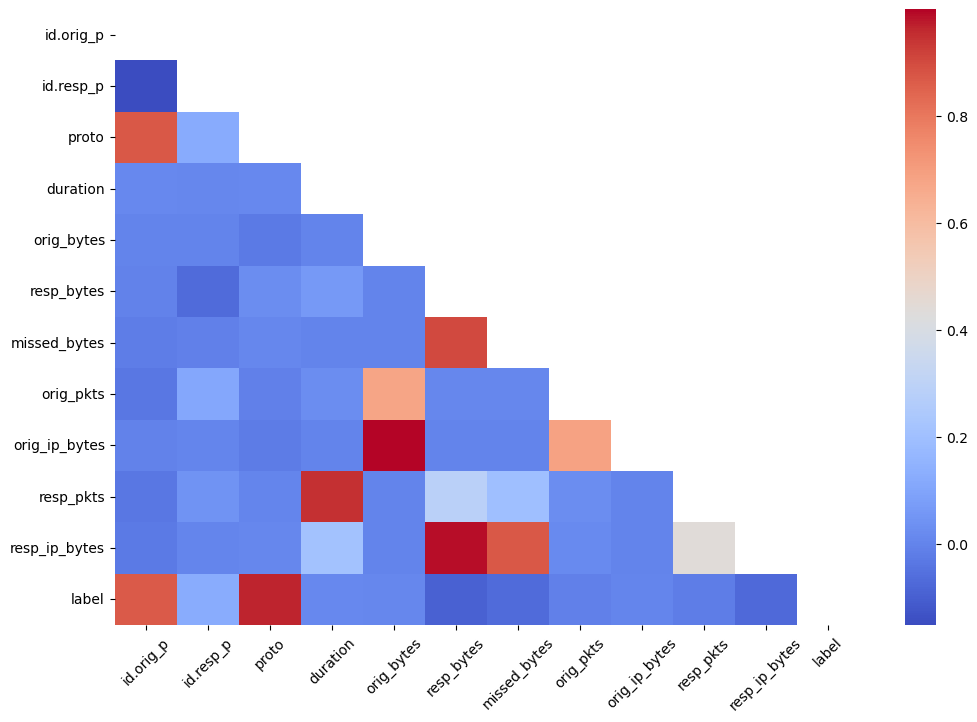

In [89]:
plt.figure(figsize=(12, 8))

corr = cleaned.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(cleaned.corr(), annot=True, mask=mask, cmap='coolwarm', fmt=".2f")

plt.xticks(rotation=45)

In [90]:
grouped = cleaned.groupby(['label', 'proto']).size().reset_index(name='count')

In [91]:
max_proto_counts = grouped.loc[grouped.groupby('label')['count'].idxmax()]

In [92]:
print(grouped)

   label  proto  count
0      0      0   1812
1      0      1    111
2      1      0      2
3      1      1  21220
